## PCA

Here we will be using the Principal Component Analysis method of dimensionality reduction for selecting important features for our model.

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("../dataset/merged.csv")
df.drop(columns=['Time(ms)'], inplace=True)
df

,ankle_acc_hor_forward,ankle_acc_ver,ankle_acc_hor_lateral,upper_leg_acc_hor_forward,upper_leg_acc_ver,upper_leg_acc_hor_lateral,trunk_acc_hor_forward,trunk_acc_ver,trunk_acc_hor_lateral,annotation
0,-40,970,326,-36,962,242,320,657,349,0
1,-60,990,316,54,953,262,77,914,446,0
2,-111,980,346,-27,953,262,-48,857,446,0
3,-111,980,346,36,981,232,-38,800,446,0
4,-60,1009,346,18,972,242,77,866,436,0
...,...,...,...,...,...,...,...,...,...,...
1021876,-212,1000,376,690,-166,282,77,942,349,1
1021877,-232,970,356,572,-55,10,67,961,339,1
1021878,-232,970,356,272,92,-70,97,961,359,1
1021879,-252,921,346,354,18,-171,87,952,359,1


In [6]:
x = df.drop('annotation', axis=1)
y = df['annotation']

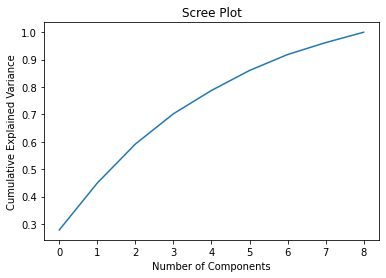

In [9]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
pca = PCA()
pca.fit_transform(x_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

In [11]:
pca = PCA(n_components=6)
x_pca = pca.fit_transform(x_scaled)
print('Explained Variance Ratio:', pca.explained_variance_ratio_)

Explained Variance Ratio: [0.27855194 0.17133403 0.14202023 0.110601   0.08502709 0.07302196]


In [14]:
pca_df = pd.DataFrame(data = x_pca, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
pca_df['annotation'] = y
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,annotation
0,-2.040942,3.389135,-0.697435,2.427390,2.321785,-0.222592,0
1,-1.235390,1.358520,-0.656503,0.102055,0.388039,-1.847160,0
2,-1.501984,1.165822,-0.824926,0.141681,1.516479,-1.859010,0
3,-1.638330,1.481119,-0.705295,0.630510,2.080654,-1.730703,0
4,-1.268800,1.588218,-0.809263,0.511559,0.913394,-1.778680,0
...,...,...,...,...,...,...,...
1021876,-3.062620,0.818409,-0.151781,0.252098,-0.139664,-1.649739,1
1021877,-2.871607,-0.420508,0.406236,0.927885,-0.445085,-1.281501,1
1021878,-2.641319,-0.747211,0.250917,1.298763,-0.566486,-1.162638,1
1021879,-3.087607,-1.209168,0.641357,1.558142,-0.524909,-0.810112,1


In [15]:
pca_df.to_csv("../dataset/pca_df.csv", index=False)